In [23]:
# Prerequesites

import mph
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from SALib.sample import fast_sampler
from SALib.analyze import fast
from SALib.plotting.bar import plot as barplot

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [30]:
# Example of how to compute the Si file from the data files. The problem definition must be the same as the problem definition used when 
# running the simulation file, which can be found in the .txt accompanying the .csv data file.

data_from_csv = np.genfromtxt("data/2024-06-22_rabbit_Ns385_10percent.csv", delimiter=",")
mfpt_from_csv = data_from_csv[:, 8]

num_vars = 9
problem = {
    'num_vars': num_vars,
    'names': ['dummy', 'a', 'b', 'lens_diam', 'lens_thick', 'h_va',
              'D', 'k_va', 'k_vr'],
    'bounds': [[0, 1],
               [0.9*0.9,     1.1*0.9],            # cm
               [0.9*0.588,   1.1*0.588],          # cm
               [0.9*0.995,   1.1*0.995],          # cm
               [0.9*0.66,    1.1*0.66],          # cm
               [0.9*0.238,   1.1*0.238],        # cm
               [0.9*1.07e-10, 1.1*1.07e-10],    # m2/s, D
               [0.9*1.91e-7, 1.1*1.91e-7],      # m/s, k_va
               [0.9*1.81e-9, 1.1*1.81e-9]       # m/s, k_vr
               ]
}

Si = fast.analyze(problem, mfpt_from_csv, print_to_console=True)
df_si = pd.DataFrame(Si)
df_si.to_csv("data/2024-06-22_rabbit_Ns385_10percent_Si.csv", index=False)

print(np.max(mfpt_from_csv))
print(np.min(mfpt_from_csv))
print(np.mean(mfpt_from_csv))

print(np.sum(df_si, 0))

                  S1        ST   S1_conf   ST_conf
dummy       0.000002  0.000657  0.035242  0.062946
a           0.092695  0.095340  0.035776  0.066981
b           0.736224  0.740287  0.044232  0.069091
lens_diam   0.000059  0.001382  0.040830  0.066352
lens_thick  0.001401  0.002194  0.040269  0.060918
h_va        0.064174  0.066126  0.039454  0.066137
D           0.159240  0.160754  0.038690  0.062099
k_va        0.003392  0.003764  0.040938  0.067797
k_vr        0.008460  0.009307  0.035646  0.067830
5.493993912650361
3.3212404769290784
4.327922071142909
S1                                        1.065646
ST                                        1.079811
S1_conf                                   0.351078
ST_conf                                   0.590151
names      dummyablens_diamlens_thickh_vaDk_vak_vr
dtype: object


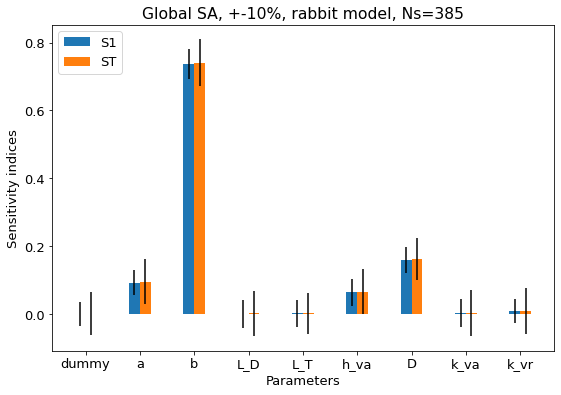

[1.58355181e-06 9.26945372e-02 7.36224227e-01 5.89212700e-05
 1.40086738e-03 6.41741354e-02 1.59239732e-01 3.39238995e-03
 8.45986464e-03]
1.0656462590499742


In [31]:
# Plot Si from csv data
Si_csv = np.genfromtxt("data/2024-06-22_rabbit_Ns385_10percent_Si.csv", delimiter=",")
matplotlib.rcParams.update({'font.size': 13})

bars1 = Si_csv[1:,0]
bars2 = Si_csv[1:,1]
yer1 = Si_csv[1:,2]
yer2 = Si_csv[1:,3]
 
# The x position of bars
barWidth = 0.2
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]

fig,ax = plt.subplots(1,1)
fig.set_size_inches(9,6)
plt.bar(r1, bars1, width = barWidth, yerr=yer1, label='S1')
plt.bar(r2, bars2, width = barWidth, yerr=yer2, label='ST')
plt.xticks([r + barWidth/2 for r in range(len(bars1))], ['dummy', 'a', 'b', 'L_D', 'L_T', 'h_va',
              'D', 'k_va', 'k_vr'])
#plt.xticks([r + barWidth/2 for r in range(len(bars1))], ['Dummy', 'a', 'b', 'height v-a'])
#plt.xticks([r + barWidth/2 for r in range(len(bars1))], ['dummy', 'b', 'h_va', 'D', 'k_va', 'k_vr'])
plt.ylabel('Sensitivity indices')
plt.xlabel('Parameters')
#plt.ylim([-0.05,0.6])
plt.legend(loc='upper left')
plt.title("Global SA, +-10%, rabbit model, Ns=385")

# Show graphic
plt.show()

print(bars1)
print(sum(bars1))

### Comparing Si with different Ns size

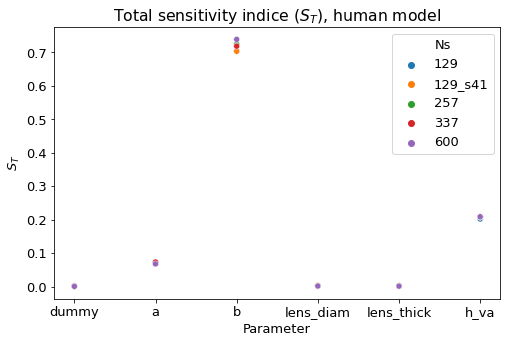

In [32]:
## Comparing Si with different Ns size, with geometrical parameters varying in their uncertainty range, in the human model

Si_csv_Ns129 = pd.read_csv("data/convergence_validation/2023-10-23_human_Ns129_Si.csv")
Si_csv_Ns129['Ns'] = '129'
Si_csv_Ns129_s41 = pd.read_csv("data/convergence_validation/2023-10-24_human_Ns129_seed41_Si.csv")
Si_csv_Ns129_s41['Ns'] = '129_s41'
Si_csv_Ns257 = pd.read_csv("data/convergence_validation/2023-10-21_human_Ns257_Si.csv")
Si_csv_Ns257['Ns'] = '257'
Si_csv_Ns337 = pd.read_csv("data/convergence_validation/2023-10-18_human_Ns337_Si.csv")
Si_csv_Ns337['Ns'] = '337'
Si_csv_Ns600 = pd.read_csv("data/convergence_validation/2023-09-07_human_Ns600_Si.csv")
Si_csv_Ns600['Ns'] = '600'

df = pd.concat([Si_csv_Ns129, Si_csv_Ns129_s41, Si_csv_Ns257, Si_csv_Ns337, Si_csv_Ns600])
g = sns.scatterplot(data=df, x='names', y = 'ST', hue='Ns')
plt.xlabel('Parameter')
plt.ylabel('$S_T$')
plt.title('Total sensitivity indice ($S_T$), human model')
g.figure.set_size_inches(8, 5)

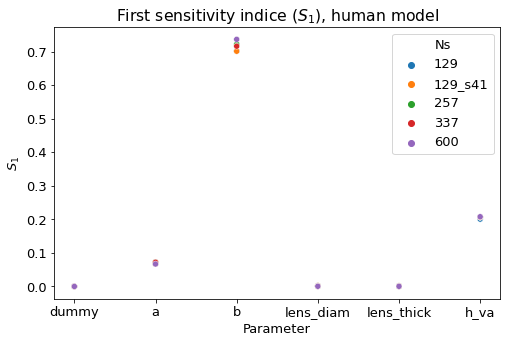

In [22]:
g2 = sns.scatterplot(data=df, x='names', y = 'S1', hue='Ns')
plt.xlabel('Parameter')
plt.ylabel('$S_1$')
plt.title('First sensitivity indice ($S_1$), human model')
g2.figure.set_size_inches(8, 5)

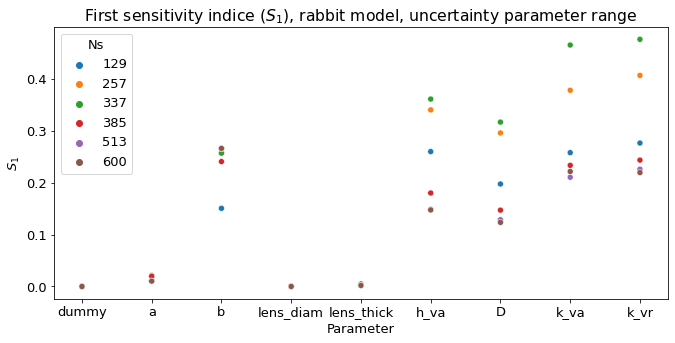

In [33]:
## Comparing the sensitivity indices with different Ns size, 
# with geometrical and physiological parameters varying in their uncertainty range, in the rabbit model

Si_csv_Ns129 = pd.read_csv("data/convergence_validation/2024-05-30_rabbit_Ns129_Si.csv")
Si_csv_Ns129['Ns'] = '129'
Si_csv_Ns257 = pd.read_csv("data/convergence_validation/2024-05-13_rabbit_Ns257_Si.csv")
Si_csv_Ns257['Ns'] = '257'
Si_csv_Ns337 = pd.read_csv("data/convergence_validation/2024-04-29_rabbit_Ns337_Si.csv")
Si_csv_Ns337['Ns'] = '337'
Si_csv_Ns385 = pd.read_csv("data/convergence_validation/2024-05-21_rabbit_Ns385_Si.csv")
Si_csv_Ns385['Ns'] = '385'
Si_csv_Ns513 = pd.read_csv("data/convergence_validation/2024-05-14_rabbit_Ns513_Si.csv")
Si_csv_Ns513['Ns'] = '513'
Si_csv_Ns600 = pd.read_csv("data/convergence_validation/2024-05-07_rabbit_Ns600_Si.csv")
Si_csv_Ns600['Ns'] = '600'

df = pd.concat([Si_csv_Ns129, Si_csv_Ns257, Si_csv_Ns337, Si_csv_Ns385, Si_csv_Ns513,  Si_csv_Ns600])
g2 = sns.scatterplot(data=df, x='names', y = 'S1', hue='Ns')
plt.xlabel('Parameter')
plt.ylabel('$S_1$')
plt.title('First sensitivity indice ($S_1$), rabbit model, uncertainty parameter range')
g2.figure.set_size_inches(11, 5)

We see above that the sensitivity indices do not converge with the sample size N_s increasing. Therefore, we fix the non influential parameters (a, l_D, and l_T) as constants, and rerun the sensitivity analysis.

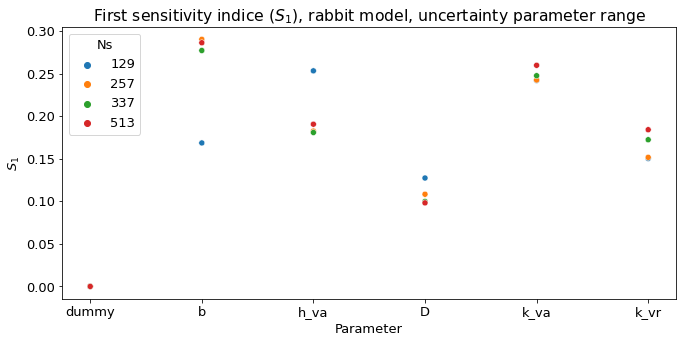

In [34]:
## Comparing the sensitivity indices with different Ns size, 
# with geometrical and physiological parameters varying in their uncertainty range, in the rabbit model
# with a reduced number of parameters, fixing as constants the ones we identified as non influential.

Si_csv_Ns129 = pd.read_csv("data/convergence_validation/2024-06-03_rabbit_Ns129_reduced_params_D_perms_Si.csv")
Si_csv_Ns129['Ns'] = '129'
Si_csv_Ns257 = pd.read_csv("data/convergence_validation/2024-06-04_rabbit_Ns257_reduced_params_D_perms_Si.csv")
Si_csv_Ns257['Ns'] = '257'
Si_csv_Ns337 = pd.read_csv("data/convergence_validation/2024-05-31_rabbit_Ns337_reduced_params_D_perms_Si.csv")
Si_csv_Ns337['Ns'] = '337'
Si_csv_Ns513 = pd.read_csv("data/convergence_validation/2024-06-03_rabbit_Ns513_reduced_params_D_perms_Si.csv")
Si_csv_Ns513['Ns'] = '513'

df = pd.concat([Si_csv_Ns129, Si_csv_Ns257, Si_csv_Ns337, Si_csv_Ns513])
g2 = sns.scatterplot(data=df, x='names', y = 'S1', hue='Ns')
plt.xlabel('Parameter')
plt.ylabel('$S_1$')
plt.title('First sensitivity indice ($S_1$), rabbit model, uncertainty parameter range')
g2.figure.set_size_inches(11, 5)

We see above that the sensitivity indices seem to converge with the sample size N_s increasing (the indices are very close to each other for N_s greater or equal to 337).

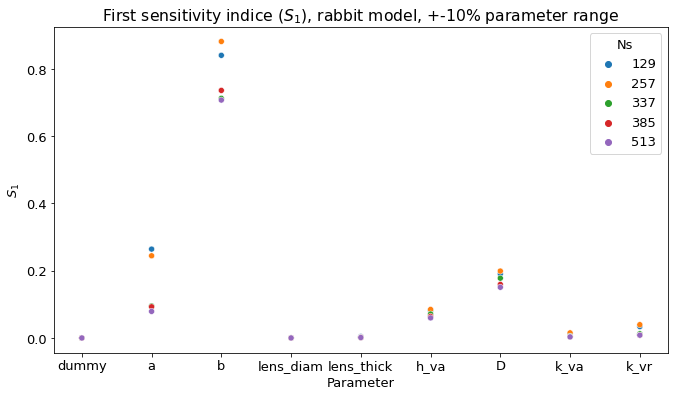

In [37]:
## Comparing the sensitivity indices with different Ns size, 
# with geometrical and physiological parameters varying in a +- 10% range around their base value, in the rabbit model.

Si_csv_Ns129 = pd.read_csv("data/convergence_validation/2024-06-19_rabbit_Ns129_10percent_Si.csv")
Si_csv_Ns129['Ns'] = '129'
Si_csv_Ns257 = pd.read_csv("data/convergence_validation/2024-06-19_rabbit_Ns257_10percent_Si.csv")
Si_csv_Ns257['Ns'] = '257'
Si_csv_Ns337 = pd.read_csv("data/convergence_validation/2024-05-01_rabbit_Ns337_10percent_Si.csv")
Si_csv_Ns337['Ns'] = '337'
Si_csv_Ns385 = pd.read_csv("data/convergence_validation/2024-06-22_rabbit_Ns385_10percent_Si.csv")
Si_csv_Ns385['Ns'] = '385'
Si_csv_Ns513 = pd.read_csv("data/convergence_validation/2024-06-07_rabbit_Ns513_10percent_Si.csv")
Si_csv_Ns513['Ns'] = '513'

df = pd.concat([Si_csv_Ns129, 
                Si_csv_Ns257, 
                Si_csv_Ns337,
                Si_csv_Ns385,
                Si_csv_Ns513
                ])
g2 = sns.scatterplot(data=df, x='names', y = 'S1', hue='Ns')
plt.xlabel('Parameter')
plt.ylabel('$S_1$')
plt.title('First sensitivity indice ($S_1$), rabbit model, +-10% parameter range')
g2.figure.set_size_inches(11, 6)

We see that the sensitivity indices seem to converge towards the same values, for Ns greater or equal to 337.

### Comparing Si with different species

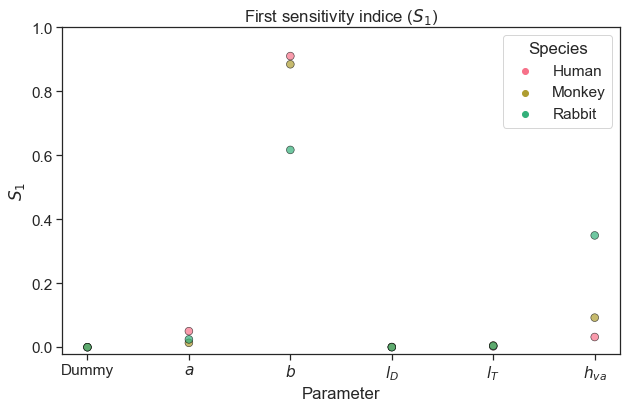

In [61]:
## Comparing Si with different species
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


sns.set_theme(style="ticks", font_scale=1.4)
sns.set_palette("husl",5)

Si_csv_human = pd.read_csv("data/2023-11-20_human_Ns337_Si.csv")
Si_csv_human['Species'] = 'Human'
Si_csv_human['names'] = ['Dummy', '$a$','$b$', '$l_D$', '$l_T$', '$h_{va}$']
Si_csv_monkey = pd.read_csv("data/2023-10-31_cyno_Ns337_Si.csv")
Si_csv_monkey['Species'] = 'Monkey'
Si_csv_monkey['names'] = ['Dummy', '$a$','$b$', '$l_D$', '$l_T$', '$h_{va}$']
Si_csv_rabbit = pd.read_csv("data/2023-11-03_rabbit_Ns337_Si.csv")
Si_csv_rabbit['Species'] = 'Rabbit'
Si_csv_rabbit['names'] = ['Dummy', '$a$','$b$', '$l_D$', '$l_T$', '$h_{va}$']


df = pd.concat([Si_csv_human, Si_csv_monkey, Si_csv_rabbit])
g = sns.scatterplot(data=df, x='names', y = 'S1', hue='Species', s=60, marker="o", alpha=0.7, edgecolor='black')
#ax.set(xlabel=['Dummy', '$a$','$b$', '$l_D$', '$l_T$', '$h_{va}$'])
plt.xlabel('Parameter')
plt.ylabel('$S_1$')
plt.title('First sensitivity indice ($S_1$)')
plt.ylim(-0.02,1)
g.figure.set_size_inches(10, 6)

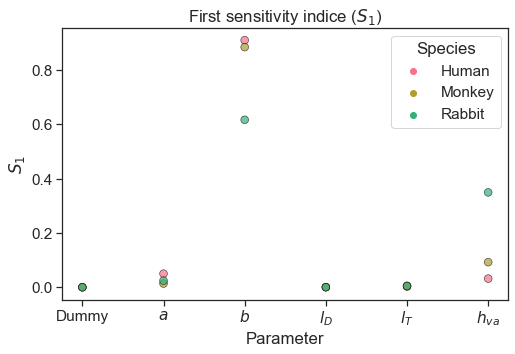

In [9]:
g = sns.scatterplot(data=df, x='names', y = 'S1', hue='Species', s=60, marker="o", alpha=0.7, edgecolor='black')
ax.set(xlabel=['Dummy', '$a$','$b$', '$l_D$', '$l_T$', '$h_{va}$'])
plt.xlabel('Parameter')
plt.ylabel('$S_1$')
plt.title('First sensitivity indice ($S_1$)')
g.figure.set_size_inches(8, 5)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


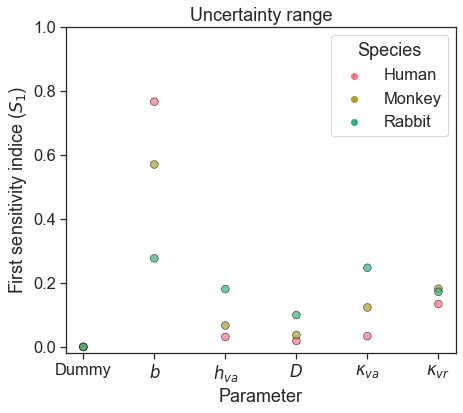

In [58]:
## Comparing Si with different species
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


sns.set_theme(style="ticks", font_scale=1.5)
sns.set_palette("husl",5)

Si_csv_human = pd.read_csv("data/2024-06-05_human_Ns337_reduced_params_D_perms_Si.csv")
Si_csv_human['Species'] = 'Human'
Si_csv_human['names'] = ['Dummy', '$b$', '$h_{va}$', '$D$', '$\kappa_{va}$', '$\kappa_{vr}$']
Si_csv_monkey = pd.read_csv("data/2024-06-06_cyno_Ns337_reduced_params_D_perms_Si.csv")
Si_csv_monkey['Species'] = 'Monkey'
Si_csv_monkey['names'] = ['Dummy', '$b$', '$h_{va}$', '$D$', '$\kappa_{va}$', '$\kappa_{vr}$']
Si_csv_rabbit = pd.read_csv("data/2024-05-31_rabbit_Ns337_reduced_params_D_perms_Si.csv")
Si_csv_rabbit['Species'] = 'Rabbit'
Si_csv_rabbit['names'] = ['Dummy', '$b$', '$h_{va}$', '$D$', '$\kappa_{va}$', '$\kappa_{vr}$']


df = pd.concat([Si_csv_human, Si_csv_monkey, Si_csv_rabbit])
g = sns.scatterplot(data=df, x='names', y = 'S1', hue='Species', s=60, marker="o", alpha=0.7, edgecolor='black')
#ax.set(xlabel=['Dummy', '$a$','$b$', '$l_D$', '$l_T$', '$h_{va}$'])
plt.xlabel('Parameter')
plt.ylabel('First sensitivity indice ($S_1$)')
plt.title('Uncertainty range')
plt.ylim(-0.02,1)
g.figure.set_size_inches(7, 6)
#plt.savefig('../../Simulation_images/Global sensitivity analysis/2024-06-24_global_SA_uncertainty_range_species_compressed.eps', format='eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


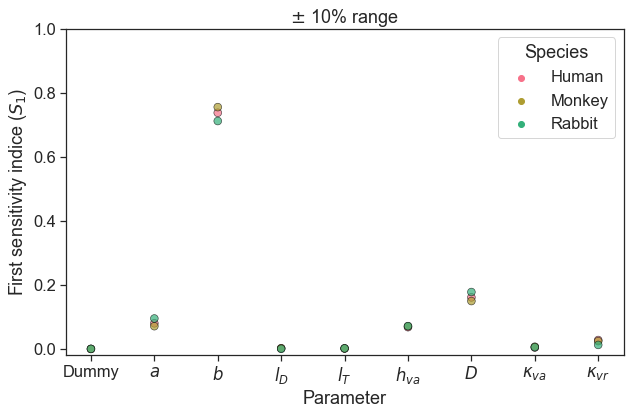

In [59]:
## Comparing Si with different species
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


sns.set_theme(style="ticks", font_scale=1.5)
sns.set_palette("husl",5)

Si_csv_human = pd.read_csv("data/2024-05-03_human_Ns337_10percent_Si.csv")
Si_csv_human['Species'] = 'Human'
Si_csv_human['names'] = ['Dummy', '$a$','$b$', '$l_D$', '$l_T$', '$h_{va}$', '$D$', '$\kappa_{va}$', '$\kappa_{vr}$']
Si_csv_monkey = pd.read_csv("data/2024-06-20_cyno_Ns337_10percent_Si.csv")
Si_csv_monkey['Species'] = 'Monkey'
Si_csv_monkey['names'] = ['Dummy', '$a$','$b$', '$l_D$', '$l_T$', '$h_{va}$', '$D$', '$\kappa_{va}$', '$\kappa_{vr}$']
Si_csv_rabbit = pd.read_csv("data/2024-05-01_rabbit_Ns337_10percent_Si.csv")
Si_csv_rabbit['Species'] = 'Rabbit'
Si_csv_rabbit['names'] = ['Dummy', '$a$','$b$', '$l_D$', '$l_T$', '$h_{va}$', '$D$', '$\kappa_{va}$', '$\kappa_{vr}$']


df = pd.concat([Si_csv_human, Si_csv_monkey, Si_csv_rabbit])
g = sns.scatterplot(data=df, x='names', y = 'S1', hue='Species', s=60, marker="o", alpha=0.7, edgecolor='black')
#ax.set(xlabel=['Dummy', '$a$','$b$', '$l_D$', '$l_T$', '$h_{va}$'])
plt.xlabel('Parameter')
plt.ylabel('First sensitivity indice ($S_1$)')
plt.title('$\pm$ 10% range')
plt.ylim(-0.02,1)
g.figure.set_size_inches(10, 6)
#plt.savefig('../../Simulation_images/Global sensitivity analysis/2024-06-24_global_SA_10percent_range_species_compressed.eps', format='eps')

# Tests with RBD fast

https://deepnote.com/workspace/first-deepnote-workspace-e08b-c9eb-e95357bc-7375-4aaa-bd7d-e912f11b8b30/project/locienotebook-c0d2556e-1cb6-461a-9e72-d77b6bd0523d/notebook/misc%2FSensitivity_analysis-05a76da7475d4dd786ef7139ae62ec47

In [11]:
import numpy as np
import pandas as pd
from SALib.analyze import rbd_fast
from SALib.sample import latin
# Compute Si

# Defining the problem
# Defining model input
sample_size = 1000
problem = {
    'num_vars': 9,
    'names': ['dummy', 'a', 'b', 'lens_diam', 'lens_thick', 'h_va', 'D',
              'kva', 'kvr'],
    'bounds': [[0, 1],
               [1.015, 1.240],    # cm
               [0.800, 0.977],      # cm
               [0.845, 1.033],        # cm
               [0.352, 0.423],      # cm
               [0.226, 0.276],       # cm
               [0.963e-10, 1.177e-10],
               [1.719e-7, 2.101e-7],
               [1.629e-9, 1.991e-9]
               ]
}

param_values = latin.sample(problem, sample_size, seed=42)

data_from_csv = np.genfromtxt("data/2023-08-30_human_10percent_diff_perm_geom.csv", delimiter=",")
mfpt_from_csv = data_from_csv[:, -1]

Si = rbd_fast.analyze(problem, Y=mfpt_from_csv, X=param_values, print_to_console=False)
df_si = pd.DataFrame(Si)
df_si.to_csv("data/2023-08-30_human_10percent_diff_perm_geom_Si.csv", index=False)

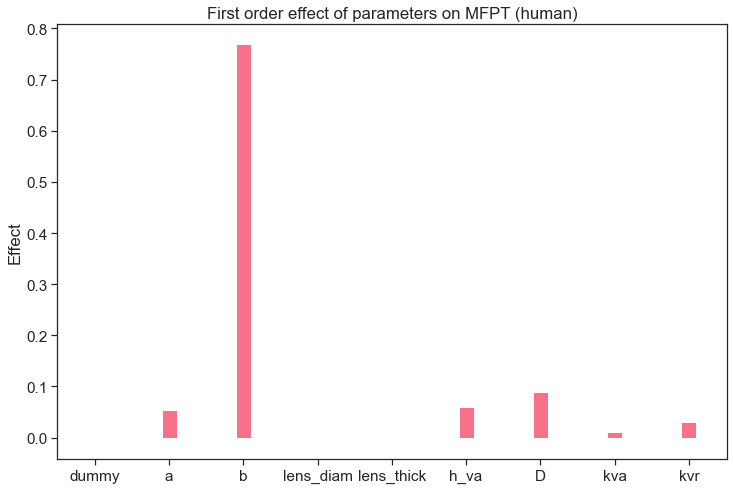

In [12]:
import matplotlib.pyplot as plt

# make nice plots with the indices (looks good on your presentations)
# do not use the plotting tools of SALib, they are made for the method of Morris ...
Si_csv = np.genfromtxt("data/2023-08-30_human_10percent_diff_perm_geom_Si.csv", delimiter=",")

bars1 = Si_csv[1:,0]
#yer1 = Si_csv[1:,2]
 
# The x position of bars
barWidth = 0.2
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]

fig,ax = plt.subplots(1,1)
fig.set_size_inches(12,8)
plt.bar(r1, bars1, width = barWidth, label='S1')
#plt.xticks([r for r in range(len(bars1))], ['Dummy', 'Volume', 'Eccentricity', 'Lens diam', 'Lens thick'])
plt.xticks([r for r in range(len(bars1))], ['dummy', 'a', 'b', 'lens_diam', 'lens_thick', 'h_va', 'D',
              'kva', 'kvr'])
plt.ylabel('Effect')
#plt.ylim([0,1.2])
#plt.legend(loc='upper left')
plt.title("First order effect of parameters on MFPT (human)")
plt.rcParams.update({'font.size': 14})
# Show graphic
plt.show()

In [13]:
from SALib.analyze import rbd_fast

n_size = 1000
## BASIC CONVERGENCE CHECK
def conv_study(n, Y, X):
    # take n samples among the num_samples, without replacement
    subset = np.random.choice(n_size, size=n, replace=False)
    return rbd_fast.analyze(problem=problem,
                            Y=Y[subset],
                            X=X[subset])['S1']

#param_values = fast_sampler.sample(problem, 100, seed=42)
all_indices = np.array([conv_study(n=n, Y=mfpt_from_csv, X=param_values)
                        for n in np.arange(50, n_size + 1, 5)])



0 dummy
1 a
2 b
3 lens_diam
4 lens_thick
5 h_va
6 D
7 kva
8 kvr


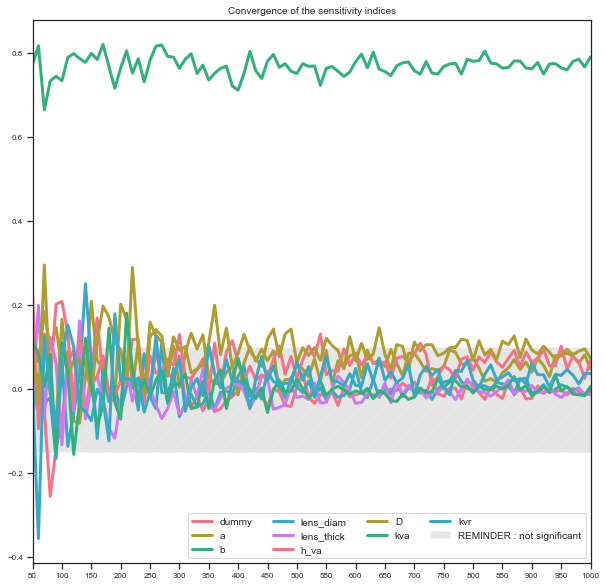

In [14]:
# convergence check
fig, ax = plt.subplots()
fig.set_size_inches(10,10)

ax.set_title('Convergence of the sensitivity indices', fontsize=10)

ax.tick_params(labelsize=8)

ax.set_xlim(xmin=0, xmax=(n_size - 50)//10)
ax.set_xticks(np.arange(0,(n_size - 50)//10 +1,5))
ax.set_xticklabels([str(i) for i in range(50,n_size+1,50)])

#ax.set_ylim(ymin=-0.15, ymax=1)


for p,param in enumerate(problem['names']):
    ax.plot(all_indices[:,p], linewidth=3, label=param)
    print(p, param)

ax.fill_between(x=[0,(n_size - 50)//10], y1=-0.15, y2=0.1, color='grey', alpha=0.2, hatch='//', edgecolor='white',
              label='REMINDER : not significant')
    
ax.legend(fontsize=10, ncol=4)

In [15]:
# TEST TEST NOT USEFUL TEST TEST
# Test to find frequences while sampling
import math

import numpy as np

from SALib.sample import common_args
from SALib.util import scale_samples, read_param_file

M = 4
N=385

problem = {
    'num_vars': 7,
    'names': ['dummy', 'r', 'hya_perm', 'ilm_perm', 'D', 'lens_diam', 'hya_arc_length'],
    'bounds': [[0, 1],
               [1.0028, 1.0906],  # cm, based on min and max values in
                                  # Azhdam 2020 for volume, assuming sphere
               [1.24e-7, 3.92e-7],  # m/s, based on thesis Hutton-Smith
                                    # (Table 3.10)
               [1.25e-9, 2.44e-9],  # m/s, based on thesis Hutton-Smith
                                    # (Table 3.10)
               [1.01e-10, 1.13e-10],  # m2/s, based on Caruso 2020
               [0.84, 1.052],   # cm, based on lower range of Manns 2007 and
                                # higher range used in Hutton-Smith 2016
               [0.3264, 0.4896]  # cm, +- 20% of LHS 2018 measure (arbitrary)
               ]
}

np.random.seed(42)
D = problem["num_vars"]
omega = np.zeros([D])
omega[0] = math.floor((N - 1) / (2 * M))
m = math.floor(omega[0] / (2 * M))

if m >= (D - 1):
    omega[1:] = np.floor(np.linspace(1, m, D - 1))
else:
    omega[1:] = np.arange(D - 1) % m + 1

print(omega)

# Discretization of the frequency space, s
s = (2 * math.pi / N) * np.arange(N)

# Transformation to get points in the X space
X = np.zeros([N * D, D])
omega2 = np.zeros([D])

for i in range(D):
    omega2[i] = omega[0]
    idx = list(range(i)) + list(range(i + 1, D))
    omega2[idx] = omega[1:]
    z = range(i * N, (i + 1) * N)

    # random phase shift on [0, 2pi) following Saltelli et al.
    # Technometrics 1999
    phi = 2 * math.pi * np.random.rand()

    for j in range(D):
        g = 0.5 + (1 / math.pi) * np.arcsin(np.sin(omega2[j] * s + phi))
        X[z, j] = g

X = scale_samples(X, problem)
print(omega2)


[48.  1.  2.  3.  4.  5.  6.]
[ 1.  2.  3.  4.  5.  6. 48.]
